# Temperatura Global

[Berkeley Earth](http://berkeleyearth.org/) publica datos históricos de temperaturas globales y regionales, los cuales pueden ser descargados desde [acá](http://berkeleyearth.org/data/).

En este notebook intentaremos recrear la siguiente gráfica, publicada en el [Global Temperature Report for 2019](http://berkeleyearth.org/2019-temperatures/).

![image](http://berkeleyearth.org/wp-content/uploads/2020/01/2019_Projection-1024x577.png)

In [13]:
from matplotlib import rcParams

rcParams["figure.dpi"] = 150

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
data = np.loadtxt("http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt", comments="%")

In [4]:
data

array([[ 1.850e+03, -5.160e-01,  1.940e-01, ...,  1.730e-01,        nan,
               nan],
       [ 1.851e+03, -3.860e-01,  2.540e-01, ...,  2.190e-01,        nan,
               nan],
       [ 1.852e+03, -3.840e-01,  2.430e-01, ...,  2.100e-01, -3.720e-01,
         1.550e-01],
       ...,
       [ 2.017e+03,  8.390e-01,  4.600e-02, ...,  4.700e-02,  7.640e-01,
         4.300e-02],
       [ 2.018e+03,  7.730e-01,  4.600e-02, ...,  4.600e-02,        nan,
               nan],
       [ 2.019e+03,  9.060e-01,  4.500e-02, ...,  4.600e-02,        nan,
               nan]])

In [5]:
data.shape

(170, 9)

In [6]:
years = data[:, 0]

In [7]:
years

array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977.,

In [8]:
temp_anual = data[:, 1]
temp_5y = data[:, 3]

In [9]:
temp_anual

array([-0.516, -0.386, -0.384, -0.411, -0.359, -0.332, -0.46 , -0.602,
       -0.454, -0.386, -0.438, -0.554, -0.635, -0.403, -0.43 , -0.317,
       -0.262, -0.25 , -0.252, -0.256, -0.341, -0.358, -0.333, -0.301,
       -0.365, -0.408, -0.411, -0.031,  0.064, -0.281, -0.333, -0.242,
       -0.306, -0.354, -0.517, -0.492, -0.529, -0.549, -0.354, -0.225,
       -0.513, -0.404, -0.45 , -0.439, -0.432, -0.364, -0.258, -0.239,
       -0.441, -0.276, -0.161, -0.233, -0.374, -0.47 , -0.517, -0.355,
       -0.285, -0.461, -0.48 , -0.536, -0.509, -0.523, -0.464, -0.413,
       -0.245, -0.179, -0.428, -0.535, -0.388, -0.307, -0.286, -0.212,
       -0.306, -0.286, -0.273, -0.236, -0.089, -0.208, -0.185, -0.375,
       -0.142, -0.087, -0.132, -0.318, -0.179, -0.222, -0.168,  0.002,
        0.006, -0.021,  0.079,  0.049,  0.007,  0.045,  0.139,  0.013,
       -0.058,  0.04 , -0.068, -0.105, -0.177, -0.004,  0.07 ,  0.132,
       -0.066, -0.113, -0.181,  0.066,  0.065,  0.035, -0.013,  0.071,
      

In [10]:
temp_5y

array([   nan,    nan, -0.411, -0.375, -0.389, -0.433, -0.441, -0.447,
       -0.468, -0.487, -0.493, -0.483, -0.492, -0.468, -0.41 , -0.333,
       -0.302, -0.267, -0.272, -0.291, -0.308, -0.318, -0.34 , -0.353,
       -0.364, -0.303, -0.23 , -0.213, -0.198, -0.165, -0.22 , -0.303,
       -0.35 , -0.382, -0.44 , -0.488, -0.488, -0.43 , -0.434, -0.409,
       -0.389, -0.406, -0.447, -0.418, -0.389, -0.346, -0.347, -0.316,
       -0.275, -0.27 , -0.297, -0.303, -0.351, -0.39 , -0.4  , -0.418,
       -0.42 , -0.423, -0.454, -0.502, -0.502, -0.489, -0.431, -0.365,
       -0.346, -0.36 , -0.355, -0.367, -0.389, -0.346, -0.3  , -0.28 ,
       -0.273, -0.263, -0.238, -0.219, -0.198, -0.219, -0.2  , -0.199,
       -0.184, -0.211, -0.172, -0.188, -0.204, -0.177, -0.112, -0.081,
       -0.02 ,  0.023,  0.024,  0.032,  0.064,  0.051,  0.029,  0.036,
        0.013, -0.035, -0.073, -0.063, -0.057, -0.017, -0.009,  0.004,
       -0.032, -0.032, -0.046, -0.026, -0.005,  0.045,  0.037,  0.036,
      

In [11]:
temperatura_referencia = 14.177

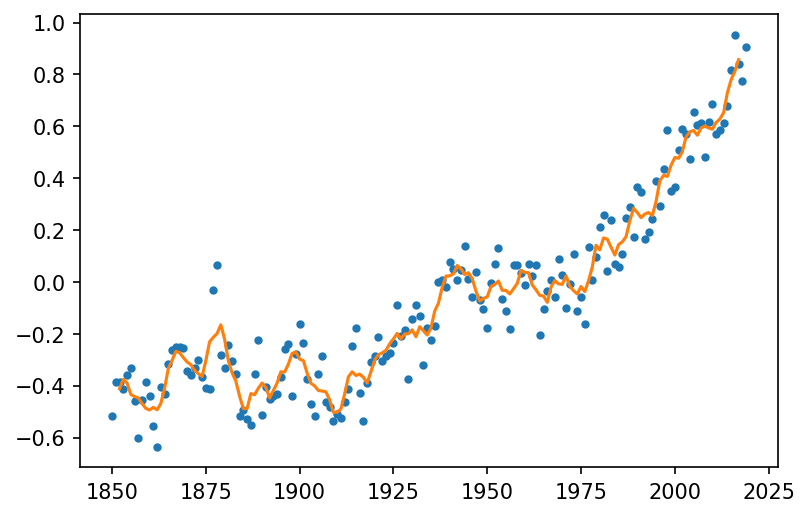

In [15]:
plt.plot(years, temp_anual, 'o', markersize=3)
plt.plot(years, temp_5y)
plt.show()

In [16]:
temp_referencia_1850_1900 = np.mean(temp_anual[years < 1900] + temperatura_referencia)

In [17]:
temp_referencia_1850_1900

13.80562

In [18]:
temp_anual += temperatura_referencia - temp_referencia_1850_1900
temp_5y += temperatura_referencia - temp_referencia_1850_1900

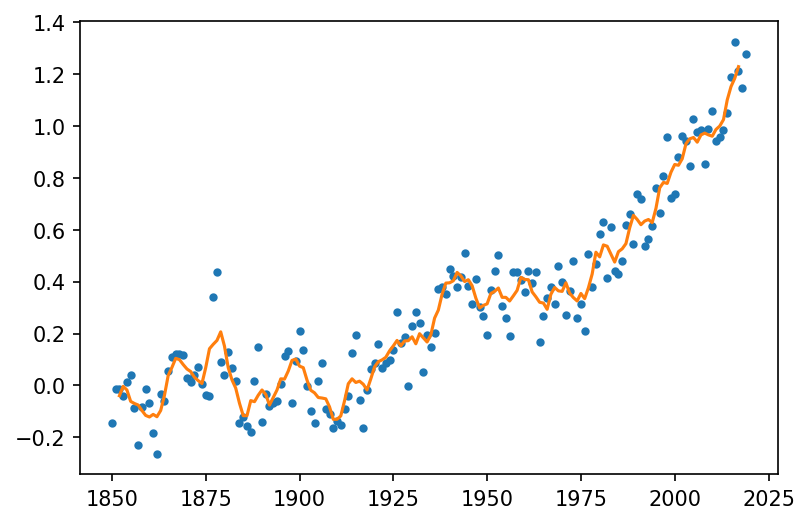

In [19]:
plt.plot(years, temp_anual, 'o', markersize=3)
plt.plot(years, temp_5y)
plt.show()

## Regresión lineal

In [22]:
condicion = (years >= 1980) & np.logical_not(np.isnan(temp_5y))

In [23]:
condicion

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
years[condicion]

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017.])

In [24]:
reg = linregress(years[condicion], temp_5y[condicion])

In [25]:
reg

LinregressResult(slope=0.019100558047926465, intercept=-37.37576946930735, rvalue=0.9816764321413141, pvalue=1.6186218596182856e-27, stderr=0.0006179421698001234)

In [29]:
years_regresion = np.array([2020, 2070])
temp_regresion = reg.slope * years_regresion + reg.intercept

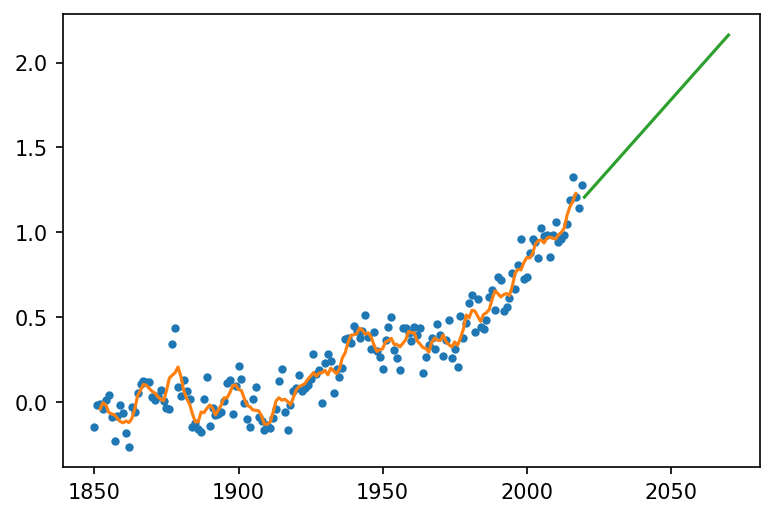

In [30]:
plt.plot(years, temp_anual, 'o', markersize=3)
plt.plot(years, temp_5y)
plt.plot(years_regresion, temp_regresion)
plt.show()

In [31]:
reg.slope * 2036 + reg.intercept

1.512966716270931

In [32]:
reg.slope * 2063 + reg.intercept

2.0286817835649487

## Mejorando la gráfica

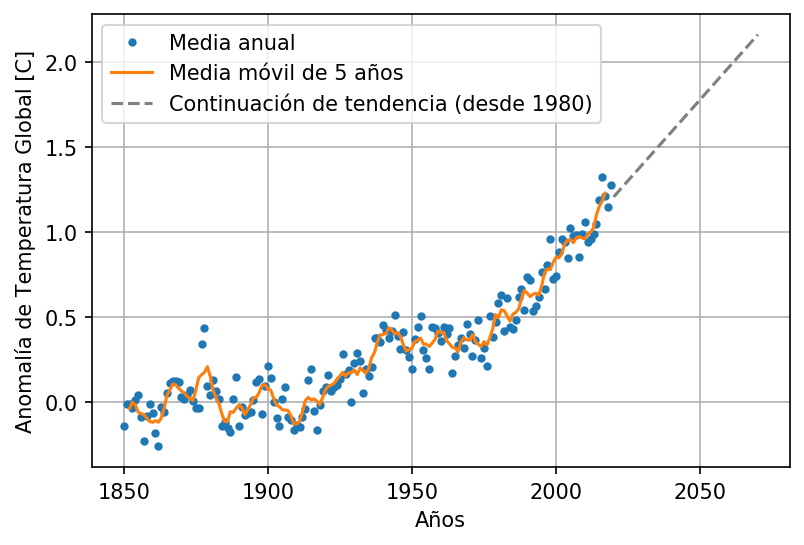

In [38]:
plt.plot(years, temp_anual, 'o', markersize=3, label="Media anual")
plt.plot(years, temp_5y, label="Media móvil de 5 años")
plt.plot(years_regresion, temp_regresion, '--', color="grey", label="Continuación de tendencia (desde 1980)")

plt.xlabel("Años")
plt.ylabel("Anomalía de Temperatura Global [C]")
plt.legend()
plt.grid()
plt.show()